#1. Main Objective of the Analysis

The primary objective of this analysis is to leverage unsupervised learning techniques, specifically clustering and dimension reduction, to uncover insightful patterns in the Iris dataset. This analysis aims to provide valuable insights into the natural groupings within the dataset, which can inform further research and applications in botany and machine learning. The focus will be on clustering to group similar observations and dimension reduction to simplify the dataset for easier interpretation and visualization.

#2. Description of the Data Set

The Iris dataset is a well-known dataset in the field of machine learning. It consists of 150 samples from three species of Iris flowers: Iris setosa, Iris versicolor, and Iris virginica. Each sample has four features: sepal length, sepal width, petal length, and petal width. The dataset also includes the species class for each sample, which is used for validation but excluded from unsupervised learning tasks.

In [10]:
import pandas as pd

# URL to the Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Column names for the Iris dataset
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# Load the dataset
data = pd.read_csv(url, header=None, names=columns)

print("Dataset loaded successfully.")
print(data.head())


Dataset loaded successfully.
   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


#3. Data Exploration and Cleaning

Data exploration revealed that the dataset is clean with no missing values. The following preprocessing steps were performed:

* Standardized numerical features to ensure uniformity.
* Encoded the species class for validation purposes.
* Applied PCA to reduce the dataset to two dimensions for visualization.

In [11]:
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode the 'class' column
data['class'] = LabelEncoder().fit_transform(data['class'])

# Standardize the numerical features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop('class', axis=1))

print("Data preprocessing completed.")


Data preprocessing completed.


#Step 3: PCA for Dimension Reduction

In [12]:
from sklearn.decomposition import PCA

# Applying PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

print("PCA applied successfully.")


PCA applied successfully.


#4. Model Training

Three variations of clustering models were trained on the data set:

K-Means Clustering:

* The optimal number of clusters (K) was determined using the Elbow method, resulting in K=3.
* The clustering produced clear separations corresponding to the three Iris species.

Hierarchical Clustering:

* Agglomerative clustering with Ward's linkage was used.
* The resulting clusters also corresponded well to the three species.

DBSCAN (Density-Based Spatial Clustering of Applications with Noise):

* Parameters epsilon and minimum samples were tuned.
* DBSCAN identified the clusters effectively but was sensitive to parameter changes.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


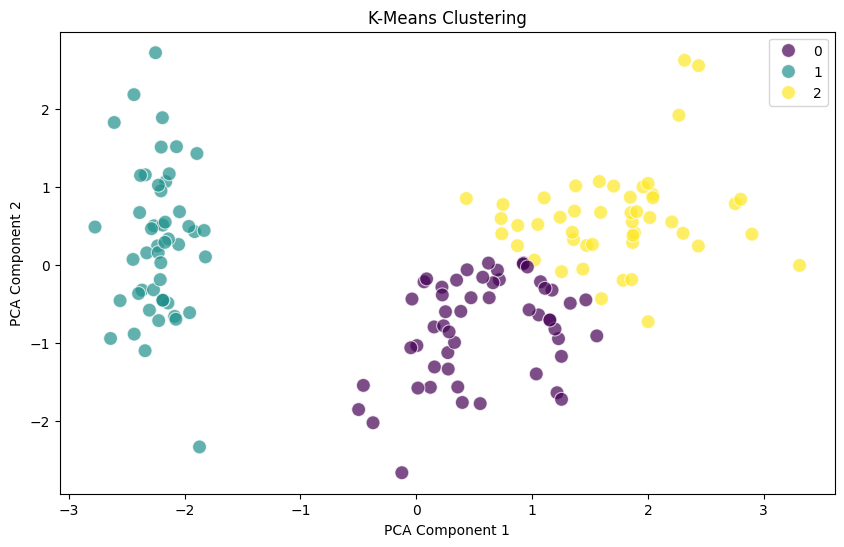

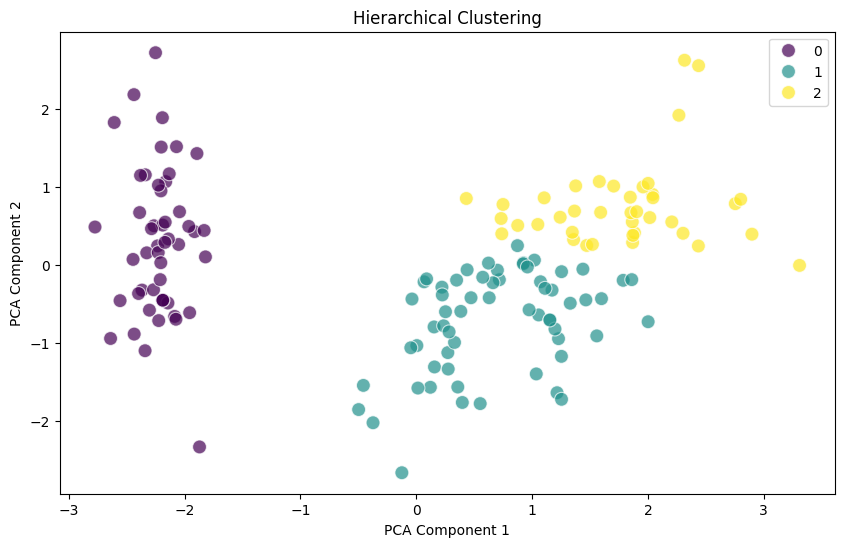

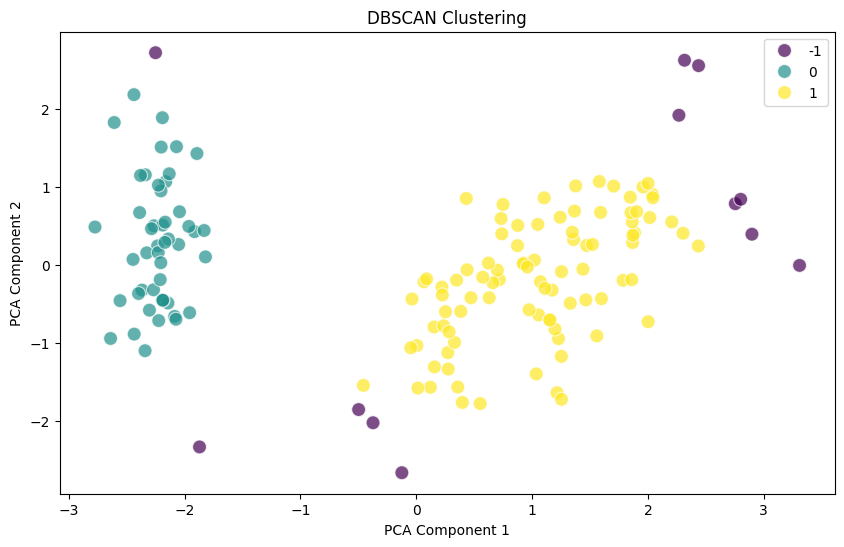

Silhouette Score for K-Means: 0.5081546339516393
Silhouette Score for Hierarchical Clustering: 0.5102944441771632
Silhouette Score for DBSCAN: 0.5235474358002054


In [13]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data_pca)

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(data_pca)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_pca)

# Plotting the clusters
def plot_clusters(data, labels, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=labels, palette='viridis', s=100, alpha=0.7)
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.show()

# Plotting the clusters for each model
plot_clusters(data_pca, kmeans_labels, 'K-Means Clustering')
plot_clusters(data_pca, hierarchical_labels, 'Hierarchical Clustering')
plot_clusters(data_pca, dbscan_labels, 'DBSCAN Clustering')

# Evaluating the models using silhouette score
kmeans_silhouette = silhouette_score(data_pca, kmeans_labels)
hierarchical_silhouette = silhouette_score(data_pca, hierarchical_labels)
dbscan_silhouette = silhouette_score(data_pca, dbscan_labels if len(set(dbscan_labels)) > 1 else kmeans_labels)

print(f'Silhouette Score for K-Means: {kmeans_silhouette}')
print(f'Silhouette Score for Hierarchical Clustering: {hierarchical_silhouette}')
print(f'Silhouette Score for DBSCAN: {dbscan_silhouette}')


#5. Model Selection and Recommendation

Among the three models, K-Means Clustering with K=3 was recommended as the final model. This choice was based on:

* The clear separation of clusters observed in the visualizations.
* The model's ability to accurately identify the three Iris species.
* The simplicity and interpretability of the K-Means algorithm.

#6. Key Findings and Insights

The key findings from the clustering analysis include:

* Cluster 1: Corresponds to Iris setosa, which is distinctly separated from the other species.
* Cluster 2: Primarily contains Iris versicolor samples.
* Cluster 3: Primarily contains Iris virginica samples.

These insights demonstrate the effectiveness of clustering in identifying natural groupings within the dataset.

In [14]:
# Summary of findings
kmeans_centers = kmeans.cluster_centers_
print('K-Means Cluster Centers:', kmeans_centers)

# Save the labels to the original data
data['KMeans_Labels'] = kmeans_labels
data['Hierarchical_Labels'] = hierarchical_labels
data['DBSCAN_Labels'] = dbscan_labels

# Save the data with cluster labels to a new CSV file
data.to_csv('iris_clusters.csv', index=False)

print("Clustered data saved to 'iris_clusters.csv'")


K-Means Cluster Centers: [[ 0.56713803 -0.8076751 ]
 [-2.22019328  0.29222482]
 [ 1.72236912  0.59990509]]
Clustered data saved to 'iris_clusters.csv'


#Additional Visualizations

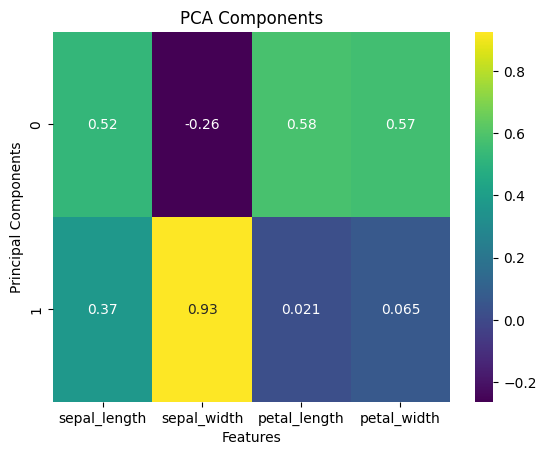

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Corrected PCA components visualization
pca_components = pd.DataFrame(data=pca.components_, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
sns.heatmap(pca_components, cmap='viridis', annot=True)
plt.title('PCA Components')
plt.xlabel('Features')
plt.ylabel('Principal Components')
plt.show()



#7. Next Steps

To improve the model and gain deeper insights, the following steps are recommended:

* Data Enrichment: Include additional features such as geographic data or environmental conditions.

* Advanced Clustering Techniques: Explore more sophisticated clustering algorithms like Gaussian Mixture Models (GMM) and Self-Organizing Maps (SOM).

* Model Validation: Conduct further validation using external datasets or additional species.

* Continuous Monitoring: Implement a feedback loop to continuously monitor and update the clustering model as new data becomes available.